# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

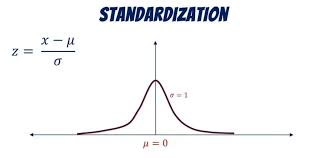


In [1]:

import pandas as pd
import numpy as np
df = pd.read_csv('Upper Secondary.csv', encoding='latin1')

# Checking data types:
print(df.dtypes)
print(df.head(2))

cols_with_missing = df.columns[df.isna().any()].tolist()
print('Missing cols:', cols_with_missing)
print('Missing counts:')
print(df.isna().sum()[df.isna().any()])

non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Non-numeric (excluded):', non_numeric_cols)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Time period' in numeric_cols:
    numeric_cols.remove('Time period')
df_numeric = df[numeric_cols].copy()
df_numeric = df_numeric.fillna(df_numeric.mean())
data_array = df_numeric.values.astype(np.float64)
data = data_array
print('Rows:', len(data))

mean = np.mean(data, axis=0)
std = np.std(data, axis=0, ddof=1)
standardized = (data - mean) / std
standardized_data = standardized
standardized_data[:5]

ISO3                        object
Countries and areas         object
Region                      object
Sub-region                  object
Development Regions         object
Total                      float64
Female                     float64
Male                       float64
Rural_Residence            float64
Urban_Residence            float64
Poorest_Wealth quintile    float64
Second_Wealth quintile     float64
Middle_Wealth quintile     float64
Fourth_Wealth quintile     float64
Richest_Wealth quintile    float64
Data source                 object
Time period                float64
dtype: object
  ISO3 Countries and areas Region Sub-region Development Regions  Total  \
0  AFG         Afghanistan     SA         SA     Least Developed   58.0   
1  ALB             Albania    ECA       EECA      More Developed   12.0   

   Female  Male  Rural_Residence  Urban_Residence  Poorest_Wealth quintile  \
0    73.0  43.0             63.0             45.0                     70.0   
1    12.0

array([[ 1.91480632e+00,  2.49413410e+00,  1.09745995e+00,
         1.62253292e+00,  1.96099787e+00,  1.32033367e+00,
         1.51338624e+00,  2.01918327e+00,  2.01870344e+00,
         2.17514581e+00],
       [-1.26140664e+00, -1.16949030e+00, -1.30404064e+00,
        -1.25721735e+00, -1.33120093e+00, -1.14387309e+00,
        -1.55872469e+00, -1.36593670e+00, -1.45506684e+00,
        -1.12208422e+00],
       [-3.63781234e-01, -5.08836723e-01, -6.45564675e-02,
        -2.15605550e-01, -2.33801330e-01, -3.98880347e-01,
        -5.15366264e-01, -5.35624250e-01, -3.91667775e-01,
        -4.62638216e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.35358646e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.51863494e-16,
         0.00000000e+00],
       [-8.75888033e-02,  2.11876275e-01, -6.06830794e-01,
         1.00982010e+00, -4.16701263e-01,  6.32648061e-01,
         7.01885235e-01, -3.44013686e-01, -6.04347588e-01,
        -7.

### Step 2: Inspect the data (done above)

Missing values and non-numeric columns were checked in the previous cell.

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
n = standardized_data.shape[0]
cov_matrix = (standardized_data.T @ standardized_data) / (n - 1)
cov_matrix

array([[1.        , 0.98069701, 0.96680777, 0.96586906, 0.94540901,
        0.92259249, 0.94603461, 0.95207556, 0.93497722, 0.87855843],
       [0.98069701, 1.        , 0.89941175, 0.95260845, 0.92173603,
        0.90602418, 0.9387622 , 0.94302113, 0.92519677, 0.87306957],
       [0.96680777, 0.89941175, 1.        , 0.92581566, 0.92207874,
        0.89193843, 0.90195943, 0.90886746, 0.89488534, 0.83473941],
       [0.96586906, 0.95260845, 0.92581566, 1.        , 0.90260902,
        0.93714235, 0.9454007 , 0.92568488, 0.8917012 , 0.81192672],
       [0.94540901, 0.92173603, 0.92207874, 0.90260902, 1.        ,
        0.84350213, 0.87653679, 0.90493182, 0.91900292, 0.91461746],
       [0.92259249, 0.90602418, 0.89193843, 0.93714235, 0.84350213,
        1.        , 0.9637857 , 0.92660943, 0.87006449, 0.79225763],
       [0.94603461, 0.9387622 , 0.90195943, 0.9454007 , 0.87653679,
        0.9637857 , 1.        , 0.96554054, 0.92382756, 0.84074637],
       [0.95207556, 0.94302113, 0.9088674

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues, eigenvectors

(array([3.86535934e-04, 1.61365267e-02, 2.24920423e-02, 3.38319411e-02,
        4.34817408e-02, 7.02204668e-02, 9.65751390e-02, 1.76163100e-01,
        3.19618512e-01, 9.22109400e+00]),
 array([[-8.09833154e-01, -1.32110886e-02, -2.19831697e-02,
         -1.86208606e-01,  2.96536856e-01,  1.66791424e-01,
          1.23689454e-01,  2.59789321e-01, -6.50198985e-02,
          3.25681102e-01],
        [ 4.63897478e-01, -9.54106873e-02, -1.11472918e-01,
         -3.33430473e-01,  2.92114561e-01,  1.33368591e-01,
          6.64962435e-01,  4.36916790e-02, -4.67878090e-02,
          3.20472526e-01],
        [ 3.57397369e-01,  6.61194333e-03,  9.07714452e-02,
         -2.62737378e-02,  2.82102904e-01,  2.03004684e-01,
         -6.02563205e-01,  5.23186055e-01, -8.51351083e-02,
          3.13762071e-01],
        [ 1.92186507e-02,  1.70514793e-01,  7.27571352e-02,
          7.89376154e-01, -1.20303717e-01, -5.35909901e-02,
          2.94595789e-01,  1.94934821e-01, -3.14766607e-01,
          3.1

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [4]:
idx = np.argsort(eigenvalues)[::-1]  # sort descending
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]
sorted_eigenvectors

array([[ 3.25681102e-01, -6.50198985e-02,  2.59789321e-01,
         1.23689454e-01,  1.66791424e-01,  2.96536856e-01,
        -1.86208606e-01, -2.19831697e-02, -1.32110886e-02,
        -8.09833154e-01],
       [ 3.20472526e-01, -4.67878090e-02,  4.36916790e-02,
         6.64962435e-01,  1.33368591e-01,  2.92114561e-01,
        -3.33430473e-01, -1.11472918e-01, -9.54106873e-02,
         4.63897478e-01],
       [ 3.13762071e-01, -8.51351083e-02,  5.23186055e-01,
        -6.02563205e-01,  2.03004684e-01,  2.82102904e-01,
        -2.62737378e-02,  9.07714452e-02,  6.61194333e-03,
         3.57397369e-01],
       [ 3.17707061e-01, -3.14766607e-01,  1.94934821e-01,
         2.94595789e-01, -5.35909901e-02, -1.20303717e-01,
         7.89376154e-01,  7.27571352e-02,  1.70514793e-01,
         1.92186507e-02],
       [ 3.13769165e-01,  3.10829955e-01,  4.26967484e-01,
         6.93123306e-02, -3.08186468e-01, -6.77795216e-01,
        -2.41715020e-01, -4.35660094e-02, -5.56028314e-02,
        -5.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [5]:
explained_var = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_var)

for i in range(len(explained_var)):
    print('PC' + str(i+1) + ':', round(explained_var[i]*100, 2), '% cumulative', round(cumulative_variance[i]*100, 2), '%')

# Find number of components needed for 95% variance
num_components = 1
for i in range(len(cumulative_variance)):
    if cumulative_variance[i] >= 0.95:
        num_components = i + 1
        break

# Make sure we don't exceed number of features
if num_components > standardized_data.shape[1]:
    num_components = standardized_data.shape[1]
print('Components (95% variance):', num_components, 'cumulative', round(cumulative_variance[num_components - 1]*100, 2), '%')

reduced_data = standardized_data @ sorted_eigenvectors[:, :num_components]
reduced_data[:5]

PC1: 92.21 % cumulative 92.21 %
PC2: 3.2 % cumulative 95.41 %
PC3: 1.76 % cumulative 97.17 %
PC4: 0.97 % cumulative 98.13 %
PC5: 0.7 % cumulative 98.84 %
PC6: 0.43 % cumulative 99.27 %
PC7: 0.34 % cumulative 99.61 %
PC8: 0.22 % cumulative 99.83 %
PC9: 0.16 % cumulative 100.0 %
PC10: 0.0 % cumulative 100.0 %
Components (95% variance): 2 cumulative 95.41 %


array([[ 5.73677526e+00,  7.84935705e-01],
       [-4.10421683e+00, -1.98780660e-03],
       [-1.16806479e+00, -5.27775793e-02],
       [-5.82906278e-17,  2.11422264e-16],
       [-6.72725318e-02, -1.53970338e+00]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [6]:
print('Shape', reduced_data.shape)
reduced_data[:5]

Shape (202, 2)


array([[ 5.73677526e+00,  7.84935705e-01],
       [-4.10421683e+00, -1.98780660e-03],
       [-1.16806479e+00, -5.27775793e-02],
       [-5.82906278e-17,  2.11422264e-16],
       [-6.72725318e-02, -1.53970338e+00]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

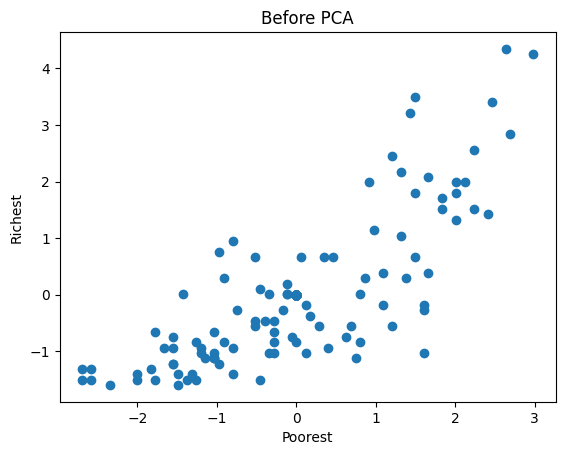

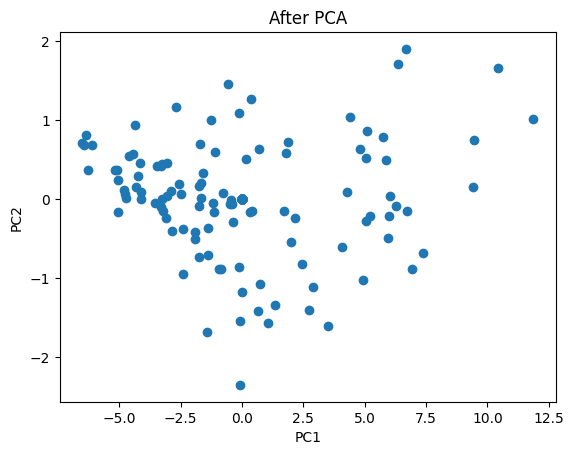

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(standardized_data[:, 5], standardized_data[:, 9])
plt.xlabel('Poorest')
plt.ylabel('Richest')
plt.title('Before PCA')
plt.show()

plt.figure()
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After PCA')
plt.show()
